<a href="https://colab.research.google.com/github/sjw509/Demo/blob/master/%E6%AF%95%E8%AE%BE_%E5%85%85%E7%94%B5%E7%AB%99%E8%A7%84%E5%88%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import sys
import random
import math
import matplotlib.pyplot as plt 

import numpy as np
 
sys.setrecursionlimit(100000000)  # 手工设置递归调用深度，防止无限递归，引起 Python崩溃

In [115]:
#========================================================================================
# 求Floyd 最短距离部分
# 交通路径参数
# Data [u, v, cost]
# 注意Python数组索引从0开始，记录节点 0 - 44 之间的连通情况 
datas= [
    [0, 1, 0.93],
    [0, 4, 0.74],
    [0, 5, 0.51],
    [1, 2, 0.93],
    [1, 6, 0.42],
    [2, 3, 0.93],
    [2, 7, 0.42],
    [3, 8, 0.42],
    [4, 9, 0.89],
    [4, 15, 2.54],
    [5, 6, 0.64],
    [5, 9, 1.03],
    [5, 10, 1.28],
    [6, 7, 0.93],
    [6, 12, 0.84],
    [7, 8, 0.93],
    [7, 13, 0.84],
    [8, 14, 0.84],
    [9, 10, 0.74],
    [9, 16, 0.89],
    [10, 11, 0.64],
    [10, 17, 0.40],
    [11, 12, 0.44],
    [11, 18, 0.40],
    [12, 13, 0.93],
    [13, 14, 0.93],
    [13, 19, 0.84],
    [14, 20, 0.84],
    [15, 16, 1.90],
    [15, 21, 0.34],
    [16, 17, 0.90],
    [16, 22, 1.51],
    [16, 23, 0.89],
    [17, 18, 0.64],
    [17, 23, 1.03],
    [18, 19, 0.93],
    [18, 24, 0.84],
    [19, 20, 0.93],
    [19, 25, 0.84],
    [20, 26, 0.84],
    [21, 22, 1.13],
    [22, 28, 1.29],
    [22, 29, 1.25],
    [23, 24, 1.24],
    [23, 29, 1.04],
    [23, 30, 1.03],
    [24, 25, 0.93],
    [24, 30, 1.06],
    [24, 31, 0.84],
    [25, 26, 0.93],
    [25, 32, 0.84],
    [26, 33, 0.84],
    [27, 28, 1.25],
    [28, 34, 1.28],
    [29, 34, 1.28],
    [29, 35, 1.08],
    [30, 31, 0.64],
    [30, 35, 1.07],
    [31, 32, 0.93],
    [31, 37, 0.88],
    [32, 33, 0.93],
    [32, 38, 0.88],
    [33, 39, 0.88],
    [34, 40, 1.25],
    [35, 36, 0.60],
    [35, 40, 1.25],
    [35, 40, 1.04],
    [36, 37, 0.64],
    [36, 41, 1.05],
    [37, 38, 0.93],
    [37, 42, 0.84],
    [38, 39, 0.93],
    [38, 43, 0.84],
    [39, 44, 0.84],
    [40, 41, 0.93],
    [41, 42, 0.93],
    [42, 43, 0.93],
    [43, 44, 1.07],
    [44, 43, 1.07],
]
 
# 交通节点数
n = 45

# 定义无穷大
inf = 9999999999
 
# 构图
graph = [[(lambda x: 0 if x[0] == x[1] else inf)([i, j]) for j in range(n)] for i in range(n)]
parents = [[i] * n for i in range(n)]  ## 关键地方，i-->j 的父结点初始化都为 i
## 用一个二维数组 parents 记录每个结点的父结点。在找最短路的时候，更新父结点。
for u, v, c in datas:
    graph[u][v] = c  # 若是有向图，边权只赋给graph[u][v]
    graph[v][u] = c  # 若是无向图，要加上这条。
 
# 弗洛伊德算法
def floyd():
    n = len(graph)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if graph[i][k] + graph[k][j] < graph[i][j]:
                    graph[i][j] = graph[i][k] + graph[k][j]
                    parents[i][j] = parents[k][j]  # 更新父结点
 
# 打印两点间的Floyd距离
def Cost():
  print("Costs:")  # 打印最短距离
  for row in graph:
    for e in row:
        print("inf" if e == inf else "%.2f" % e, end="\t")
    print()
 
floyd()
# Cost()
 
# print(graph[0][34],'\n') 
# 计算出任意两点之间的最短路径，保存在 graph[i][j] 表示 i 到 j 的最短距离
#========================================================================================

In [121]:
# 45个节点的 x 坐标
xx = [
    3.71,
    4.64,
    5.57,
    6.5,
    3.1,
    4,
    4.64,
    5.57,
    6.5,
    3.4,
    4,
    4.64,
    4.64,
    5.57,
    6.5,
    1.2,
    3.1,
    4,
    4.64,
    5.57,
    6.5,
    0.92,
    1.85,
    3.4,
    4.64,
    5.57,
    6.5,
    0,
    0.92,
    2.78,
    4,
    4.64,
    5.57,
    6.5,
    1.85,
    3.4,
    4,
    4.64,
    5.57,
    6.5,
    2.78,
    3.71,
    4.64,
    5.57,
    6.5,
]
 
# 45个节点的 y 坐标
yy = [
    6.5,
    6.5,
    6.5,
    6.5,
    6.08,
    6.08,
    6.08,
    6.08,
    6.08,
    5.24,
    4.8,
    4.8,
    5.24,
    5.24,
    5.24,
    4.4,
    4.4,
    4.4,
    4.4,
    4.4,
    4.4,
    4.2,
    3.56,
    3.56,
    3.56,
    3.56,
    3.56,
    3.56,
    2.72,
    2.72,
    2.72,
    2.72,
    2.72,
    2.72,
    1.84,
    1.84,
    1.84,
    1.84,
    1.84,
    1.84,
    1,
    1,
    1,
    1,
    1,
]
# 生成[x,y]坐标点形成的数组，供后面查找节点位置使用
# 可以使用循环赋值，也可以使用 list\zip函数，如
#node=list(zip(xx,yy))  # 这里的 node=[(x1,y1),(x2,y2)...]
node=[0]*45
for i in range(45):
  node[i]=[xx[i],yy[i]]# 这里的 node=[[x1,y1],[x2,y2]...]
#print(node[1][1])
 
# 随机生成若干点，初始化充电站地址
nx=[]
ny=[]

# 充电站点数
N=7

for i in range(N):
  nx.append(random.uniform(0,7))
  ny.append(random.uniform(0,7))
  nx =[round(a,2) for a in nx] #对随机生成的浮点数取2位小数
  ny =[round(b,2) for b in ny]
print('充电站坐标：',[nx,ny],'\n')
 
cells=[0]*N # 7个充电站的坐标
for j in range(N):
  cells[j]=[nx[j],ny[j]]
# print(cells,'\n')
 
# ----------------------------------------------------------------------------
# 计算充电站最近的交通节点
dmin=[0]*N
a=[0]*N
for j in range(N):
  dmin[j] = math.hypot(nx[j]-3.71, ny[j]-6.5) 
  for i in range(45): # 递归计算 45个点中离充电站r最近的点
    d = math.hypot(xx[i] - nx[j], yy[i] - ny[j])
    if d < dmin[j]:    
      dmin[j] = d
      xmin = xx[i]
      ymin = yy[i]
  a[j]= node.index([xmin,ymin])
  dmin[j] = round(dmin[j],2) # 取两位小数
# 考虑 最短的两点欧氏距离
#--------{......}------# 后续筛选校核中 考虑 配电网潮流约束 !!!
#--------{......}------
#----------------------------------------------------------------------------
# 定位最近的交通节点

# 交通节点名称像Python数组索引一样由0开始 ！！
print('离充电站最近的交通节点（0 - 44）为: ',a,'\n') 
print('离充电站最近的交通节点的坐标：',[xmin,ymin],'\n')
# 输出交通节点离充电站的最短距离
print('离充电站最近的交通节点的欧氏距离 dmin = ',dmin,'\n')
 
# 任一交通点到离充电站的"最短路径距离"
DMIN=[0]*N
for j in range(N):
  Dmin=[0]*45
  DMIN[j]=Dmin
  for i in range(45):
    Dmin[i] = graph[i][a[j]]+dmin[j] 
    Dmin[i] = round (Dmin[i],2)#取两位小数
print('任一节点到充电站的最短路径距离Dmin = ',DMIN,'\n')# 7个充电站



充电站坐标： [[0.58, 5.63, 3.28, 3.55, 6.31, 5.18, 4.29], [5.05, 6.46, 5.61, 5.95, 6.14, 6.83, 2.05]] 

离充电站最近的交通节点（0 - 44）为:  [15, 2, 9, 4, 8, 2, 36] 

离充电站最近的交通节点的坐标： [4, 1.84] 

离充电站最近的交通节点的欧氏距离 dmin =  [0.9, 0.07, 0.39, 0.47, 0.2, 0.51, 0.36] 

任一节点到充电站的最短路径距离Dmin =  [[4.18, 5.11, 6.04, 6.97, 3.44, 4.69, 5.33, 6.26, 7.19, 3.69, 4.1, 4.74, 5.18, 6.11, 7.04, 0.9, 2.8, 3.7, 4.34, 5.27, 6.2, 1.24, 2.37, 3.69, 4.93, 5.86, 6.79, 4.91, 3.66, 3.62, 4.72, 5.36, 6.29, 7.22, 4.9, 4.7, 5.3, 5.94, 6.87, 7.8, 5.74, 6.35, 6.78, 7.71, 8.64], [1.93, 1.0, 0.07, 1.0, 2.67, 2.06, 1.42, 0.49, 1.42, 3.09, 3.34, 2.7, 2.26, 1.33, 2.26, 5.21, 3.98, 3.74, 3.1, 2.17, 3.1, 5.55, 5.49, 4.77, 3.94, 3.01, 3.94, 8.03, 6.78, 5.81, 5.0, 4.78, 3.85, 4.78, 7.09, 6.07, 6.3, 5.66, 4.73, 5.66, 7.11, 7.35, 6.5, 5.57, 6.5], [1.93, 2.48, 3.41, 4.34, 1.28, 1.42, 2.06, 2.99, 3.92, 0.39, 1.13, 1.77, 2.21, 3.14, 4.07, 3.18, 1.28, 1.53, 2.17, 3.1, 4.03, 3.52, 2.79, 2.17, 3.01, 3.94, 4.87, 5.33, 4.08, 3.21, 3.2, 3.84, 4.77, 5.7, 4.49,

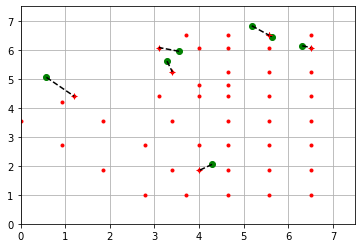

In [123]:
# ------------------------------------------------------------------------
# 画图 (目前的充电站点是随机生成)
plt.plot(xx,yy,'r.') # 交通节点
plt.plot(nx,ny,'go') # 充电站
for j in range(7):
  plt.plot(xx[a[j]],yy[a[j]],'r+')
  plt.plot([nx[j],xx[a[j]]],[ny[j],yy[a[j]]],'k--') # 连接充电站和最近的交通节点
 
plt.xlim(0,7.5) #设置的x轴上下限值。下面y轴同理。
plt.ylim(0,7.5)
plt.grid(True)

[0.58, 5.05]


(0.0, 7.5)

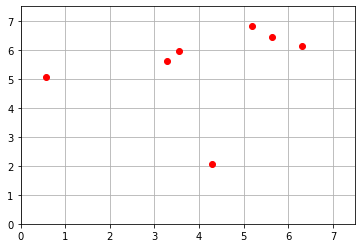

In [122]:
#print(node[a])
print(cells[0])
plt.plot(nx,ny,'ro')
plt.grid(True)
plt.xlim(0,7.5)
plt.ylim(0,7.5)

In [119]:
print(DMIN[1][1])

5.52
